
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Probability and Statistics (25732) <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>

<font color=3C99D size=5>
Computer Assignment 2 - Fall 2024<br>

<font color=696880 size=4>
Ali Akbari - Kooshan Fattah - Arad Mehinejad Kashani

### Information  
Complete the information box below.

In [ ]:
full_name = 'MohammadMobin Jeloda'
student_id = '402101493'

You need not write a report for this assignment, you only have to write down your answers in the empty markdown cells and you only need to fill in the empty cells for each question. All you have to do is fill the notebook given to you, and upload the completed notebook only.

# Q1

## 1. Data, data, data

> *For your questions on this section, refer to aradkashani@yahoo.com or @aradmnk on Telegram. Telegram is answered faster.*

> *The use of ChatGPT or other LLM copilots is not only allowed, but also **recommended**.*

In this section you will be introduced to data analysis, prediction via data, and real-world applications of standard statistical characteristics.

### 1.1 Loading the dataset

The collection of informative data is called a "dataset". You are provided with the "Spotify Most Streamed Songs" dataset, and the aim is to extract meaningful information out of lots of data.

There are different types of data models, you have been given the simplest to work with: a `.csv` file. The python library `pandas` is perfect for this type of data, as it is fast and stores your data on the RAM (contrary to databases), making it suitable for working with small datasets.

Run the cell below to load your dataset:

In [446]:
import pandas as pd
import os

# Change this if your working directory is different
directory = os.getcwd()

# Change this if you changed your filename
file_name = "Spotify Most Streamed Songs.csv"

dataframe = pd.read_csv(os.path.join(directory, file_name))

### 1.2 Understanding the data

A good practice to understand your data is to first see its `.head()`. Use the `.head()` function and show the first 10 rows of the data.

In [447]:
print(dataframe.head(10))


                            track_name              artist(s)_name  \
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                 LALA                 Myke Towers   
2                              vampire              Olivia Rodrigo   
3                         Cruel Summer                Taylor Swift   
4                       WHERE SHE GOES                   Bad Bunny   
5                             Sprinter           Dave, Central Cee   
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma   
7                             Columbia                     Quevedo   
8                             fukumean                       Gunna   
9                      La Bebe - Remix       Peso Pluma, Yng Lvcas   

   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023       

Show the columns of the dataframe in a python list:

In [448]:
column_names = dataframe.columns.tolist()
print(column_names)


['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'cover_url']


To find the number of rows and columns, use the `.shape` attribute of the dataframe:

In [449]:
print(dataframe.shape)


(953, 25)


To get a summary of the data-types and to see if the data contains `null` values, use the `.info()` function:

In [450]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### 1.3 Nulls and duplicates

Many times the data contains duplicate values or `null`. This will negatively affect your analysis. Therefore, we perform "data cleaning" to fix this issue.

Use `.is_null().sum()` and report what percentage of the data is null **for each column**.

In [451]:
missing_data = dataframe.isnull().sum() 
total_rows = len(dataframe) 
null_percentage = (missing_data / total_rows) * 100
print(null_percentage)


track_name              0.00000
artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
cover_url               0.00000
dtype: float64


Use `.duplicated().sum()` to find if the data contains any duplicates.

In [452]:
duplicate_rows = dataframe.duplicated().sum()
print(duplicate_rows)



0


### 1.4 Data-type conversions

Take a look at your `.info()` again. Using common sense, should the columns `"streams"`, `"in_deezer_playlists"`, and `"in_shazam_charts"` be of type `object`? The answer is no! But they are. As a result, to clean the data, we have to convert these fields to a desirable data type.

This how you can perform `SELECT` in `pandas`:

In [453]:
columns_for_conversion = ("streams", "in_deezer_playlists", "in_shazam_charts")


Judging by the values, convert the data-type of columns with unwanted data-types to numerical data.

In [454]:
def convert_column(column_name):
    dataframe[column_name] = dataframe[column_name].replace({',': ''}, regex=True)
    dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')

for column_name in columns_for_conversion:
    convert_column(column_name)


### 1.5 Visualizations

We are interested in finding the number of unique values in each column. Use `.nunique()` to perform this:

In [455]:
unique_value_counts = dataframe.nunique()
print(unique_value_counts)



track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 948
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
cover_url               535
dtype: int64


As you may see, there are several points of interest already!

Use `.value_counts()` and plot a barplot of the number of `"artist_count"`. The x-axis should be the number of artists, and the y-axis should be the frequency of the corresponding number of artists.

> **Using `seaborn` instead of raw `matplotlib` for plots has bonus points. Using `plotly` has even more!**

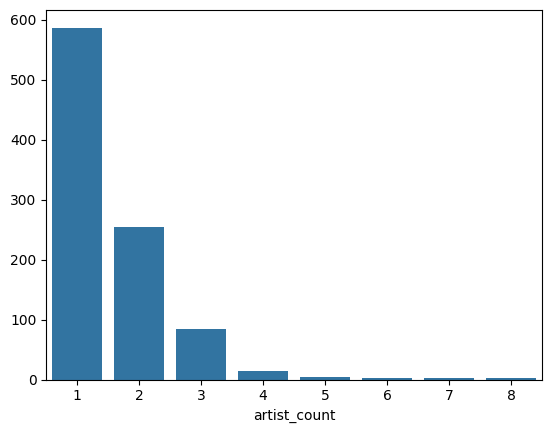

In [456]:
import seaborn as sns
import matplotlib.pyplot as plt

artist_count_data = dataframe['artist_count'].value_counts()

sns.barplot(x=artist_count_data.index, y=artist_count_data.values)
plt.show()


Now find the songs with 8 featured artists:

In [457]:
filtered_songs = dataframe.loc[dataframe['artist_count'] == 8]
print(filtered_songs)


          track_name                                     artist(s)_name  \
35   Los del Espacio  Big One, Duki, Lit Killah, Maria Becerra, FMK,...   
642         Se Le Ve  Arcangel, De La Ghetto, Justin Quiles, Lenny T...   

     artist_count  released_year  released_month  released_day  \
35              8           2023               6             1   
642             8           2021               8            12   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
35                   1150                 31  123122413.0                  22   
642                  1560                  0  223319934.0                  72   

     ...  key   mode  danceability_%  valence_%  energy_% acousticness_%  \
35   ...  NaN  Major              81         63        68             11   
642  ...    G  Minor              56         61        76             10   

    instrumentalness_%  liveness_%  speechiness_%  cover_url  
35                   0          11     

To get a general idea of the distribution of the data, some statistics give valuable insight. The may include the **mean**, **median**, **mode**, **standard deviation**, **minimum** and **maxiumum**, etc.

Instead of calculating each value individually, `pandas` has a built-in function `.describe()` that provides most of this valuable information. Use it on the column `"streams"` to get a feel for how many times a song gets streamed on Spotify:

In [458]:
stream_summary = dataframe['streams'].describe()
print(stream_summary)


count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64


To see the distribution of  `"streams"`, a good idea is to plot a histogram of the data. What does the distribtuion you see resemble the most? Can you find an easy way to verify your guess?

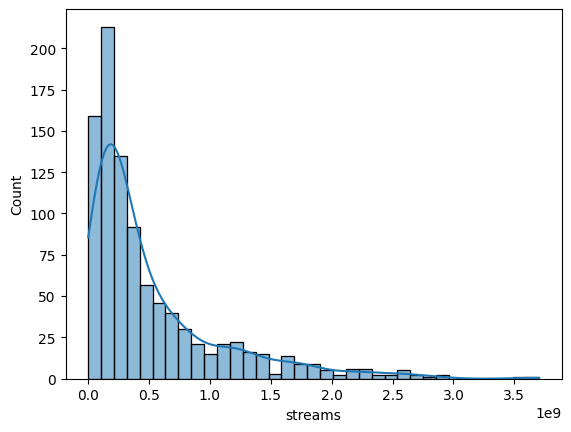

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataframe['streams'], kde=True)
plt.show()


#### 1.5.2 Statistics and Outliers

Now, again, plot the histogram and indicate where the mean is on the plot (using a marker with different color, etc). Does the mean give a good idea of where the data is mostly located?

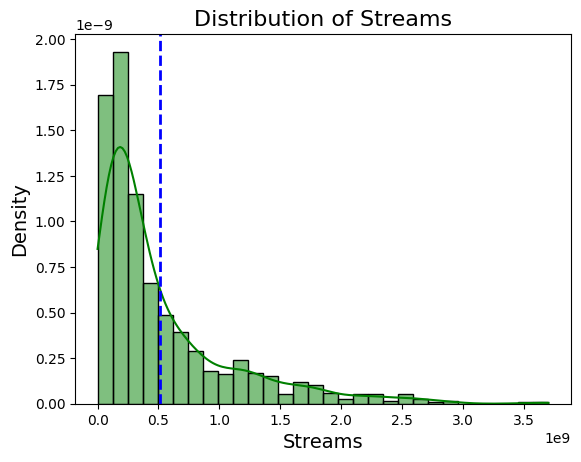

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt

average_streams = dataframe['streams'].mean()

sns.histplot(dataframe['streams'], kde=True, color='green', bins=30, stat='density')
plt.axvline(average_streams, color='blue', linestyle='--', linewidth=2)
plt.title('Distribution of Streams', fontsize=16)
plt.xlabel('Streams', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


#No, due to outliers, the mean is not a good representation of the center of the data distribution.

As you may see, the mean is not very useful when dealing with certain distributions. Even though it is well-defined, most of the data is not around the mean because **the mean is not resilient to outliers**. A good alternative for these situations is the **median**. Plot the same histogram, but indicate the median instead of the mean this time.

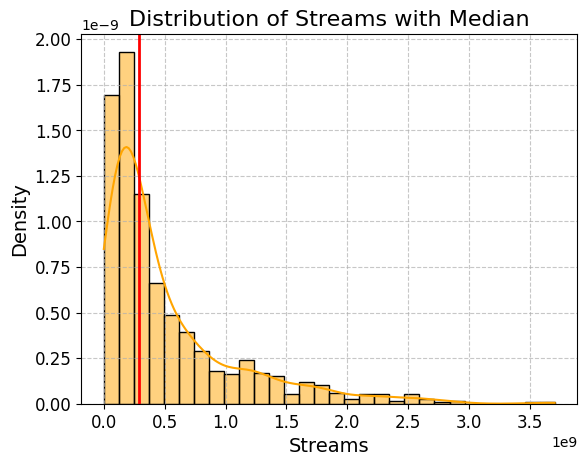

In [461]:
import seaborn as sns
import matplotlib.pyplot as plt

median_streams = dataframe['streams'].median()

sns.histplot(dataframe['streams'], kde=True, color='orange', bins=30, stat='density')
plt.axvline(median_streams, color='red', linestyle='-', linewidth=2)
plt.title('Distribution of Streams with Median', fontsize=16)
plt.xlabel('Streams', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add grid and customize ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Another resilient statistic to outliers is the **mode**. Is the **mode** meaningful for the `"streams"` data? Why?

Yes, because the values that occur most frequently have a significant difference from the other values.

Another approach to deal with outliers is using **quantiles**. You have come across the quartiles (4-quantile) when using the `.describe()` function, as the 25%, 50%, and the 75% percentile (equivalent to quartiles). Sometimes outliers can destroy your results (especially in machine learning!), so you might have to resort to using a percentage of the data, in the middle.

A helpful plot to understand these quantiles is the **box-plot**. Draw the box-plot for the `"streams"` data.

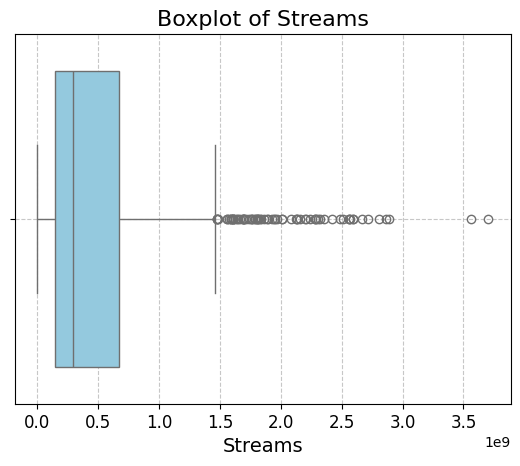

In [462]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=dataframe['streams'], color='skyblue')
plt.title('Boxplot of Streams', fontsize=16)
plt.xlabel('Streams', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#### 1.5.3 Ratios and Conditionals

Plot two pie-charts of the data using the `"key"` and `"mode"` columns.

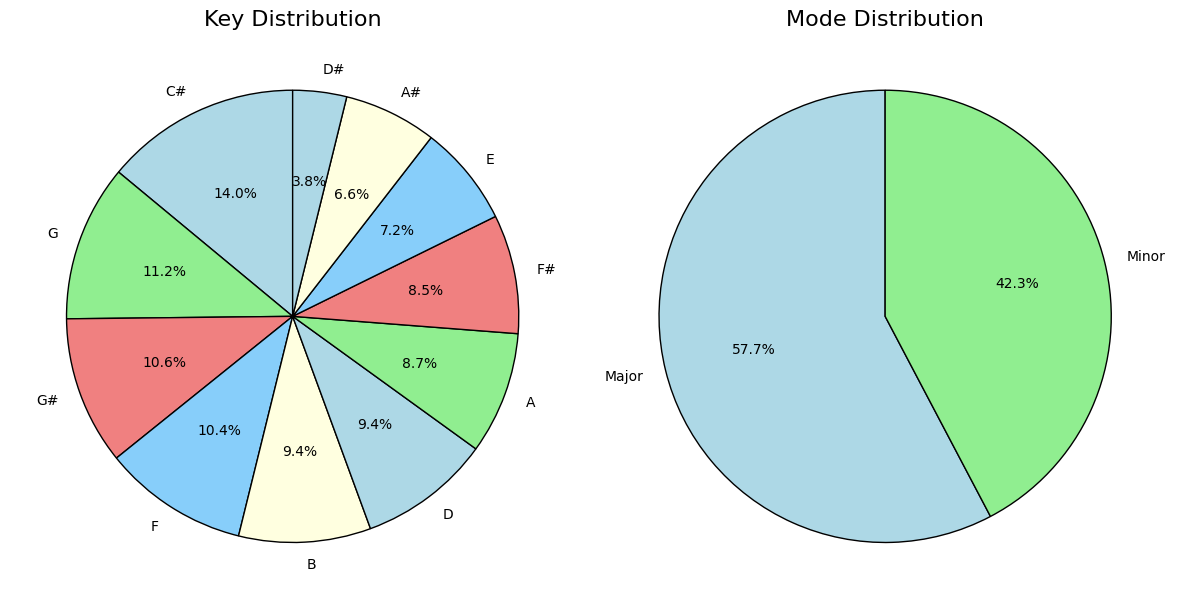

In [463]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
dataframe['key'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightyellow'], wedgeprops={'edgecolor': 'black'})
plt.title('Key Distribution', fontsize=16)
plt.ylabel('', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
dataframe['mode'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'], wedgeprops={'edgecolor': 'black'})
plt.title('Mode Distribution', fontsize=16)
plt.ylabel('', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


What is the most common combination of `"mode"` and `"scale"`? Use code the find the answer. An example answer would be *G Major*.

In [464]:
common_pair = dataframe.groupby(["key", "mode"]).size().idxmax()
formatted_result = f"Key: {common_pair[0]}, Mode: {common_pair[1]}"

print("Most frequent combination of key and mode:", formatted_result)


Most frequent combination of key and mode: Key: C#, Mode: Major


Using your answer from the previous question, what is the mean number of `"streams"` of these songs with the most common combination of `"mode"` and `"scale"`?

In [485]:
frequent_pair = dataframe.groupby(["key", "mode"]).size().idxmax()
filtered_data = dataframe[(dataframe["key"] == frequent_pair[0]) & (dataframe["mode"] == frequent_pair[1])]
average_streams = filtered_data["streams"].mean()

print(f"Average streams for the most frequent key and mode combination: {average_streams:.2f}")


Average streams for the most frequent key and mode combination: 628588294.21


In [505]:
total_avg_streams = dataframe["streams"].mean()
if average_streams > total_avg_streams:
    print("The mean streams of the selected combination are higher than the overall average.")
else:
    print("The mean streams of the selected combination are lower than or equal to the overall average.")


The mean streams of the selected combination are higher than the overall average.


### 1.6 Correlations

#### 1.6.1 Pearson

Many times, some variables may be related to each other, in many different ways. Sometimes this leads to obvious **correlations** in the data between different variables. This means by observing an increase in one variable, we may expect an increase (or decrease if the correlation is negative) in the other variable. In this section, we are interested in finding the **linear correlation** between two variables. We will be using the *Pearson Correlation Coefficient* for this matter. You have seen this statistic in your textbooks as $\rho$ or $r$.

Find the Pearson correlation between `"danceability_%"` and `"bpm"`.

*BPM (beat-per-minute) is a measure of a song's speed. The higher the BPM, the faster the song.*

In [524]:
correlation_value = dataframe["danceability_%"].corr(dataframe["bpm"])
print(f"Pearson correlation between danceability and bpm: {correlation_value:.2f}")



Pearson correlation between danceability and bpm: -0.15


#### 1.6.2 Correlation Matrix

Each variable may have correlation with any other variable, giving us a unique value for each pair of variables. A smart way of visualizing this is the **correlation matrix**. 

Select the columns `"artist_count"`,
`"released_year"`,
`"streams"`,
`"bpm"`,
`"danceability_%"`, and
`"energy_%"`. Find the correlation matrix between the variables and plot your results. Use colors (and the values themselves as text) in the matrix cells to show how high (or low) the value is. Try to use built-in functions such as `.corr()`.

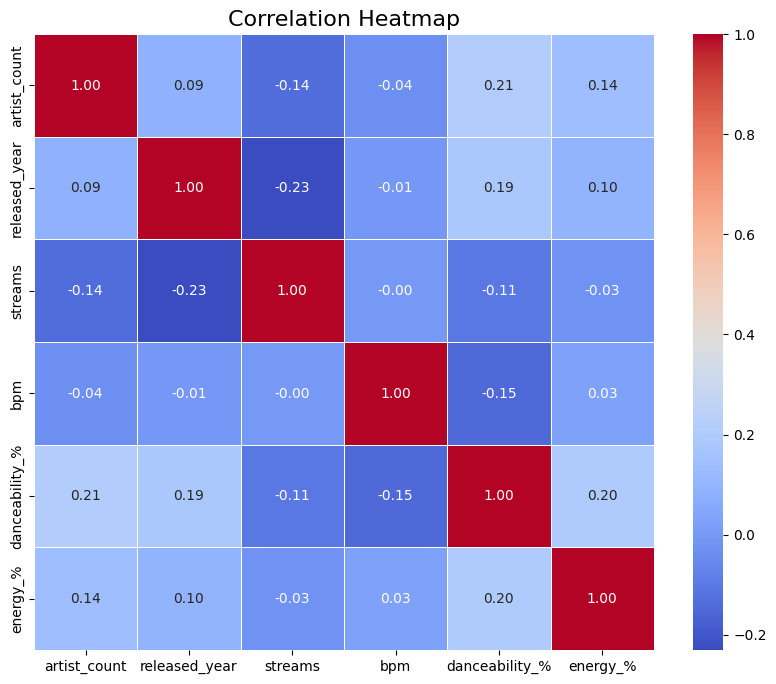

In [542]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ["artist_count", "released_year", "streams", "bpm", "danceability_%", "energy_%"]
correlation_matrix = dataframe[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


Another alternative to the correlation matrix is using a *pair-plot*. Draw the pair-plot for the same selected data and see if the two types of visualization match.

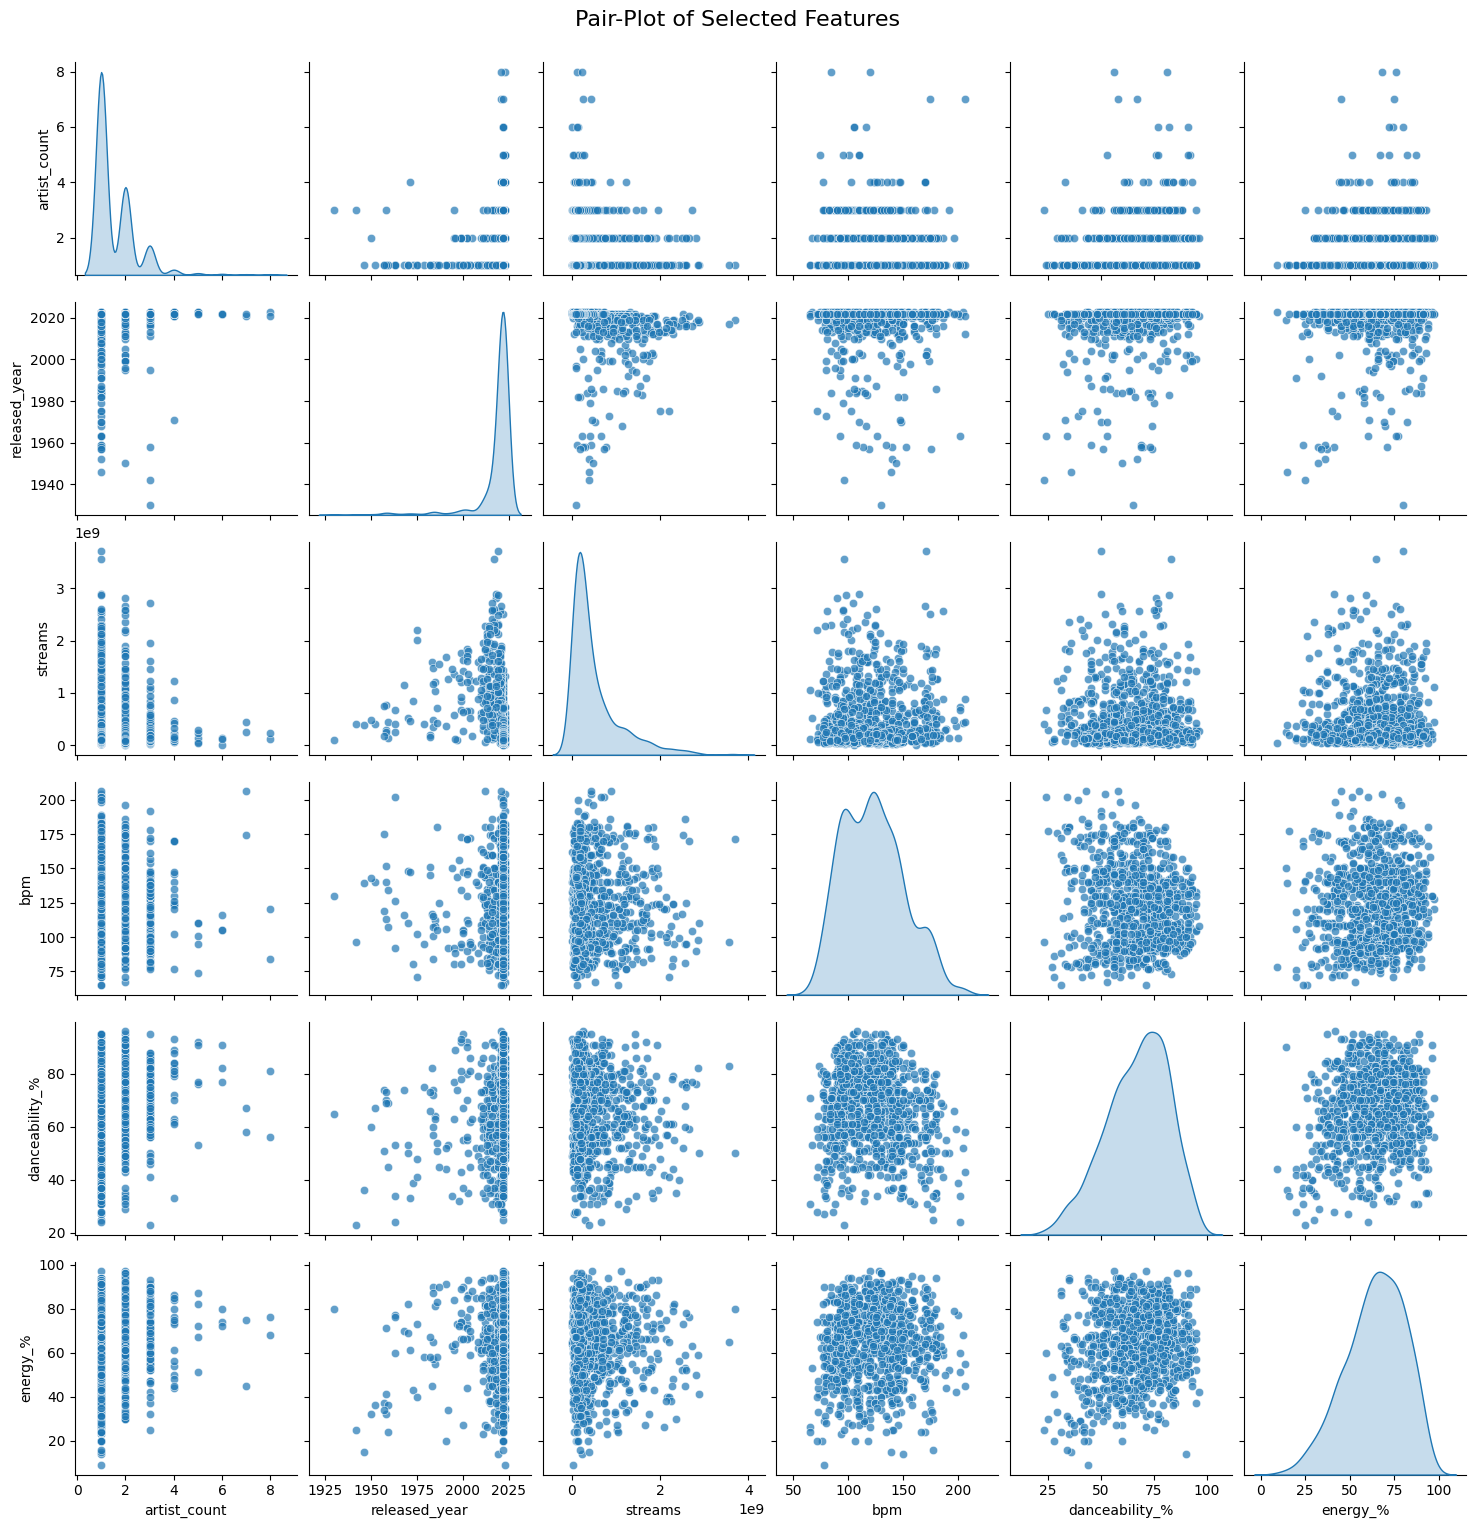

In [575]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ["artist_count", "released_year", "streams", "bpm", "danceability_%", "energy_%"]

sns.pairplot(dataframe[selected_columns], diag_kind='kde', markers='o', plot_kws={'alpha': 0.7})
plt.suptitle('Pair-Plot of Selected Features', y=1.02, fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Try to infer **3** pieces of valuable information judging based on your correlation values. You are allowed to hypothesize freely.

#### 1.6.3 Regression: Introduction to machine learning

We are interested in predicting the value of one variable from another. For instance, plot a scatter plot of `"in_spotify_playlists"` vs `"streams"`. Can you spot a linear relationship?

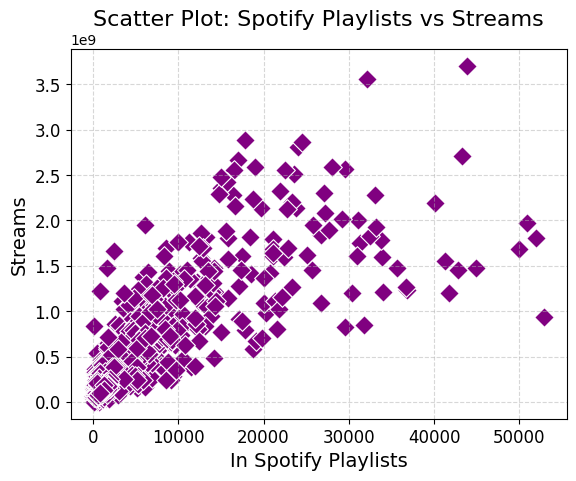

In [591]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=dataframe, x='in_spotify_playlists', y='streams', color='purple', s=100, marker='D')
plt.title('Scatter Plot: Spotify Playlists vs Streams', fontsize=16)
plt.xlabel('In Spotify Playlists', fontsize=14)
plt.ylabel('Streams', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Now, divide the data into a **training** and **test** set. Use 95% of the data as training data, leave the other 5% for test. Try to make this split random. A good choice for this task is `sklearn.model_selection.train_test_split()`.

In [606]:
from sklearn.model_selection import train_test_split

X_features = dataframe[['in_spotify_playlists']]
y_target = dataframe['streams']

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_features, y_target, test_size=0.05, random_state=42)

print(f"Training features shape: {X_train_data.shape}")
print(f"Test features shape: {X_test_data.shape}")
print(f"Training target shape: {y_train_data.shape}")
print(f"Test target shape: {y_test_data.shape}")

print(f"Training data size: {X_train_data.shape[0]} rows")
print(f"Test data size: {X_test_data.shape[0]} rows")


Training features shape: (905, 1)
Test features shape: (48, 1)
Training target shape: (905,)
Test target shape: (48,)
Training data size: 905 rows
Test data size: 48 rows


Fit a line between the two variables `"in_spotify_playlists"` and `"streams"` <i><b><u>in your training set</u></b></i>. Plot the fitted line, alongside a scatter plot of the training data. You can use `sklearn.linear_model.LinearRegression`.

* *You may have to remove `nan`, `-inf` and `inf` values from your data!*

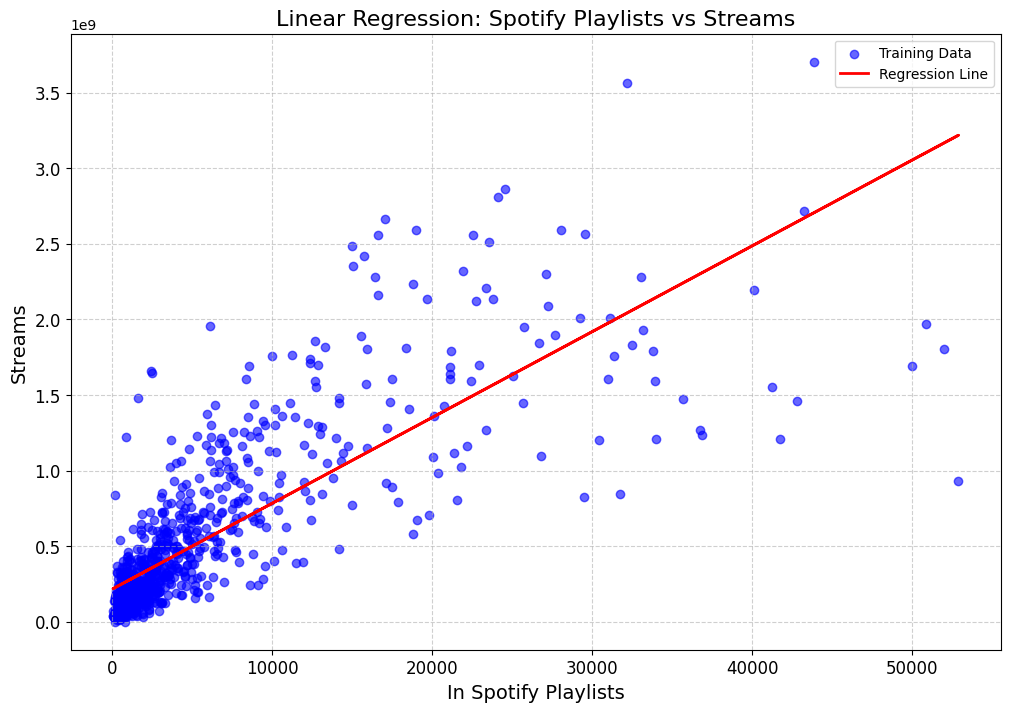

In [620]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

cleaned_data = dataframe.replace([np.inf, -np.inf], np.nan).dropna(subset=["in_spotify_playlists", "streams"])

X_features = cleaned_data[["in_spotify_playlists"]]
y_target = cleaned_data["streams"]

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_features, y_target, test_size=0.05, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train_data, y_train_data)

y_predictions = regression_model.predict(X_train_data)

plt.figure(figsize=(12, 8))

plt.scatter(X_train_data, y_train_data, color='blue', label='Training Data', alpha=0.6)

plt.plot(X_train_data, y_predictions, color='red', label='Regression Line', linewidth=2)

plt.title('Linear Regression: Spotify Playlists vs Streams', fontsize=16)
plt.xlabel('In Spotify Playlists', fontsize=14)
plt.ylabel('Streams', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()


To better judge if the fitted line is good or not, we may define some sort of *error* or *cost* function for the **test** data. One candidate is the MSE (mean squared error), defined as:

$$
\frac{1}{N}\sum^N_{i=1} ({\hat{y}_i} - y_i)^2
$$

Where ${\hat{y}_i}$ is the i-th predicted value, $y_i$ is the real i-th value, $N$ is the size of the data, and ${\hat{y}_i}$ is acquired by using your linear regression model on $x_i$.

Use the MSE function <i><b><u>your test set</u></b></i> and report your loss. You can use `sklearn.metrics.mean_squared_error()`.

In [633]:
from sklearn.metrics import mean_squared_error

y_test_predictions = regression_model.predict(X_test_data)

mse_value = mean_squared_error(y_test_data, y_test_predictions)

print(mse_value)


1.879694612953253e+17


This value may be too large, and too uninformative. This is why we sometimes use RMSE (root mean squared error) to get the same dimensionality.

$$ \mathrm{RMSE}(Y,\hat{Y}) = \sqrt{\mathrm{MSE}(Y,\hat{Y})} $$

Report the RMSE.

In [645]:
import numpy as np

rmse_value = np.sqrt(mse_value)

print(f"Root Mean Squared Error (RMSE): {rmse_value:.4f}")


Root Mean Squared Error (RMSE): 433554450.2082


Again this value is to scale with your $y$ values. For example if $y$ is your `"streams"` data, it will be in the order of billions! To normalize the loss, we use a metric called $\mathrm{NRMSE}$ (normalized root mean squared). There are different ways of defining the $\mathrm{NRMSE}$, we will use this formula:

$$
\mathrm{NRMSE}(Y,\hat{Y}) = \frac{\mathrm{RMSE}(Y,\hat{Y})}{Q_3-Q_1}
$$

Where $Q_3$ and $Q_1$ are your quartiles. This type of $\mathrm{NRMSE}$ is known as the inter-quartile range $\mathrm{NRMSE}$.

Report your inter-quartile range $\mathrm{NRMSE}$.

In [656]:
lower_quartile = y_test_data.quantile(0.25)
upper_quartile = y_test_data.quantile(0.75)
interquartile_range = upper_quartile - lower_quartile

normalized_rmse = rmse_value / interquartile_range

print(f"Normalized Root Mean Squared Error (NRMSE): {normalized_rmse:.4f}")

# Additional details
print(f"Lower Quartile (Q1) value: {lower_quartile:.4f}")
print(f"Upper Quartile (Q3) value: {upper_quartile:.4f}")
print(f"Interquartile Range (Q3 - Q1): {interquartile_range:.4f}")


Normalized Root Mean Squared Error (NRMSE): 0.7775
Lower Quartile (Q1) value: 133764333.5000
Upper Quartile (Q3) value: 691393731.7500
Interquartile Range (Q3 - Q1): 557629398.2500


#### 1.6.4 Correlation vs. Independence

This section has nothing to do with your original DataFrame.

Consider $X \sim U(0,1)$. Sample from $X$ 10000 times.

In [657]:
import numpy as np
X = np.random.uniform(0, 1, 10000)

Now consider $Y = X^{2000}$. Calculate each sample of $Y_i$ using $X_i$.

In [658]:
Y = X**2000

Plot a scatter plot of $X$ on the x-axis vs $Y$ on the y-axis.

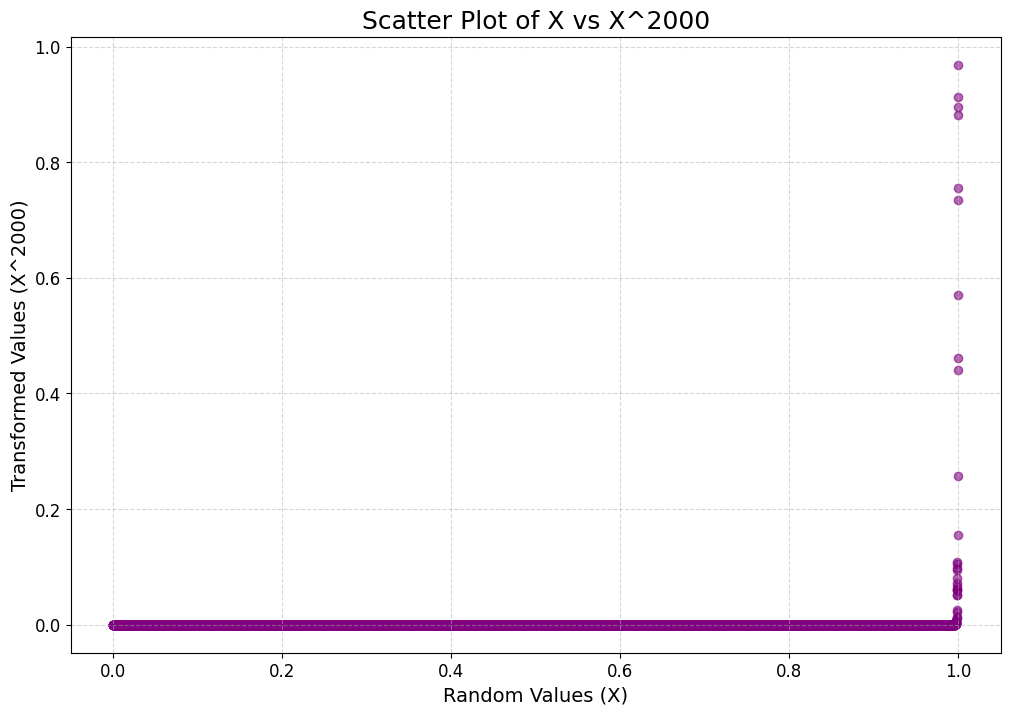

In [666]:
import numpy as np
import matplotlib.pyplot as plt

random_values = np.random.uniform(0, 1, 10000)

transformed_values = random_values ** 2000

plt.figure(figsize=(12, 8))

plt.scatter(random_values, transformed_values, alpha=0.6, color='purple')

plt.title("Scatter Plot of X vs X^2000", fontsize=18)
plt.xlabel("Random Values (X)", fontsize=14)
plt.ylabel("Transformed Values (X^2000)", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Calculate the Pearson Correlation Coefficient $\rho(X,Y)$ for all samples of $X$ and $Y$ using python.

In [691]:
import numpy as np

random_values = np.random.uniform(0, 1, 10000)

transformed_values = random_values ** 2000

pearson_correlation = np.corrcoef(random_values, transformed_values)[0, 1]

print(pearson_correlation)


0.06002948319277653


The correlation coefficient you get must be very small, leading you to conclude that the two are not related, and perhaps even independent. However, $Y$ is a function of $X$! This can be a common mistake when dealing with data.

Do not forget that:

> "Two independent random variables are always uncorrelated, **but the converse is not necessarily true.**"

There are other types of correlation coefficients, one of them is **Spearman's Rank Correlation**. This correlation is commonly intrepreted as *"an assessment of how well the relationship between two variables can be described using a monotonic function"*. Use this method to calculate the correlation of $X$ and $Y$.

* You may use `scipy.stats.spearmanr()`.

In [697]:
import numpy as np
from scipy.stats import spearmanr

random_data = np.random.uniform(0, 1, 10000)
transformed_data = random_data ** 2000
rank_corr, _ = spearmanr(random_data, transformed_data)
print(f"Spearman's Rank Correlation Coefficient: {rank_corr:.4f}")
print(f"First 5 values of the random data: {random_data[:5]}")
print(f"First 5 transformed values: {transformed_data[:5]}")


Spearman's Rank Correlation Coefficient: 0.8237
First 5 values of the random data: [0.43562196 0.42537788 0.9536526  0.61795809 0.66009169]
First 5 transformed values: [0.00000000e+00 0.00000000e+00 6.03112384e-42 0.00000000e+00
 0.00000000e+00]


# Q2

**Big Far Bakery**


Alex’s bakery has grown, and now they need to monitor quality control closely across multiple batches of cookies. Alex wants to estimate the probability of getting a range of results (e.g., between 25 and 35 cookies with chocolate chips) in different-sized batches, and compare these probabilities to see if their recipe consistency can be maintained as the bakery scales up. Alex also wants to verify these probabilities by simulating multiple batches and seeing how often they meet the target ranges.

## part A:
Calculate the probability that in a batch of 100 cookies, between 25 and 35 cookies contain chocolate chips, using continuity correction.

In [702]:
import scipy.stats as stats
import math

sample_size = 100
probability_success = 0.3
mean = sample_size * probability_success
std_dev = math.sqrt(sample_size * probability_success * (1 - probability_success))

lower_limit = 24.5
upper_limit = 35.5

z_lower = (lower_limit - mean) / std_dev
z_upper = (upper_limit - mean) / std_dev

probability = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

print(f"Lower bound Z-score: {z_lower:.4f}")
print(f"Upper bound Z-score: {z_upper:.4f}")
print(f"Probability of the range ({lower_limit}, {upper_limit}): {probability:.4f}")
print(f"Mean of the distribution: {mean:.2f}")
print(f"Standard deviation of the distribution: {std_dev:.2f}")


Lower bound Z-score: -1.2002
Upper bound Z-score: 1.2002
Probability of the range (24.5, 35.5): 0.7699
Mean of the distribution: 30.00
Standard deviation of the distribution: 4.58


## part B:
 Now, in a larger batch of 500 cookies, calculate the probability that between 150 and 200 cookies contain chocolate chips, using continuity correction.

In [706]:
import scipy.stats as stats
import math

sample_size = 500
probability_success = 0.3

mean = sample_size * probability_success
std_dev = math.sqrt(sample_size * probability_success * (1 - probability_success))

lower_limit = 149.5
upper_limit = 200.5

z_lower = (lower_limit - mean) / std_dev
z_upper = (upper_limit - mean) / std_dev

probability_range = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

print(f"Sample size: {sample_size}")
print(f"Probability of success: {probability_success}")
print(f"Mean of the distribution: {mean:.2f}")
print(f"Standard deviation of the distribution: {std_dev:.2f}")
print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit}")
print(f"Z-score for the lower bound: {z_lower:.4f}")
print(f"Z-score for the upper bound: {z_upper:.4f}")
print(f"Probability for the range [{lower_limit}, {upper_limit}]: {probability_range:.4f}")


Sample size: 500
Probability of success: 0.3
Mean of the distribution: 150.00
Standard deviation of the distribution: 10.25
Lower limit: 149.5, Upper limit: 200.5
Z-score for the lower bound: -0.0488
Z-score for the upper bound: 4.9283
Probability for the range [149.5, 200.5]: 0.5195


## Part c:
 Simulate 10,000 batches for both Part a and Part b scenarios. Count how often the simulated results fall within the ranges, and compare these empirical probabilities with the theoretical probabilities.

In [709]:
import numpy as np
import scipy.stats as stats
import math

def calculate_probability(n, p, lower_bound, upper_bound):
    mean = n * p
    std_dev = math.sqrt(n * p * (1 - p))
    z_lower = (lower_bound - mean) / std_dev
    z_upper = (upper_bound - mean) / std_dev
    return stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

def calculate_empirical_probability(n, p, lower_bound, upper_bound, trials=10000):
    batches = np.random.binomial(n, p, trials)
    return np.mean((batches >= lower_bound) & (batches <= upper_bound))

n1, p1, lower_bound1, upper_bound1 = 100, 0.3, 24.5, 35.5
n2, p2, lower_bound2, upper_bound2 = 500, 0.3, 150.5, 200.5

prob_a = calculate_probability(n1, p1, lower_bound1, upper_bound1)
empirical_prob_a = calculate_empirical_probability(n1, p1, 25, 35)

prob_b = calculate_probability(n2, p2, lower_bound2, upper_bound2)
empirical_prob_b = calculate_empirical_probability(n2, p2, 150, 200)

print(f"Probability A: {prob_a}")
print(f"Empirical Probability A: {empirical_prob_a}")
print(f"Probability B: {prob_b}")
print(f"Empirical Probability B: {empirical_prob_b}")


Probability A: 0.7699377019736033
Empirical Probability A: 0.7687
Probability B: 0.4805409172218319
Empirical Probability B: 0.5129


# Q3


Consider two independent random variables $ X_1 $ and $ X_2 $ uniformly distributed over the interval $[0, 1]$. Generate 50,000 samples for each of these random variables.

Now define the random variables $ Y_1 $ and $ Y_2 $ as follows:

$$
Y_1 = \sqrt{-2 \ln(X_1)} \cos(2\pi X_2), \quad Y_2 = \sqrt{-2 \ln(X_1)} \sin(2\pi X_2)
$$

1. Plot the histograms of the random variables $ Y_1 $ and $ Y_2 $. Then, using an appropriate plot, display the joint distribution of $ Y_1 $ and $ Y_2 $.

2. Based on the joint distribution, determine the correlation between $ Y_1 $ and $ Y_2 $. Discuss whether these random variables are independent.

3. Calculate the mean and variance of the random variables $ Y_1 $ and $ Y_2 $.

4. Generate 50,000 samples from a Gaussian random variable $ Z $ with the same mean and variance as $ Y_1 $. Then, using an appropriate plot, compare the distribution functions of $ Z $, $ Y_1 $, and $ Y_2 $. What conclusion can you draw?

5. Consider the random variable $ R = \sqrt{Y_1^2 + Y_2^2} $. Calculate its expected value. Then, display the joint distribution of $ Y_1 $ and $ R $ using an appropriate plot.

6. Determine the correlation between $ Y_1 $ and $ R $. Discuss whether these random variables are independent.


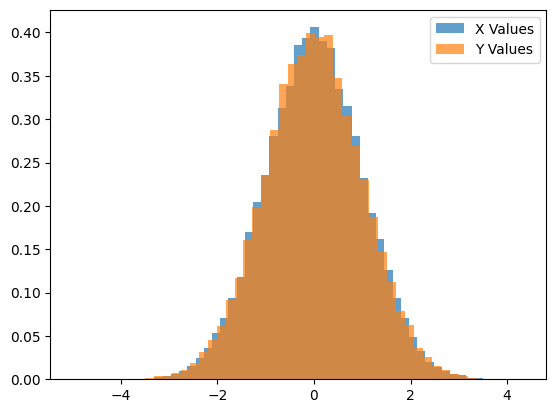

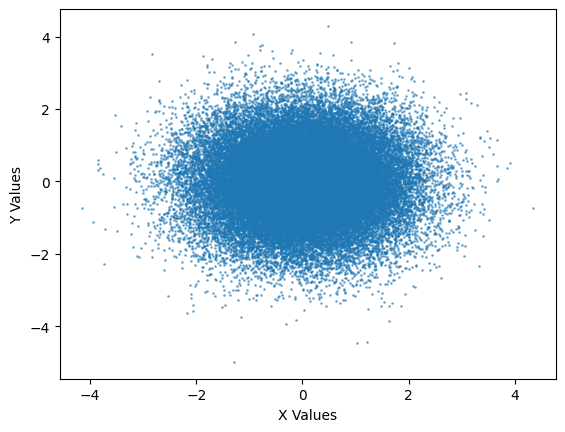

Correlation between X and Y: -0.0012057473771767873
Mean of X: 0.005076222501163159, Variance of X: 0.9981466002285229
Mean of Y: -0.0020935968204325033, Variance of Y: 1.0091735353944777


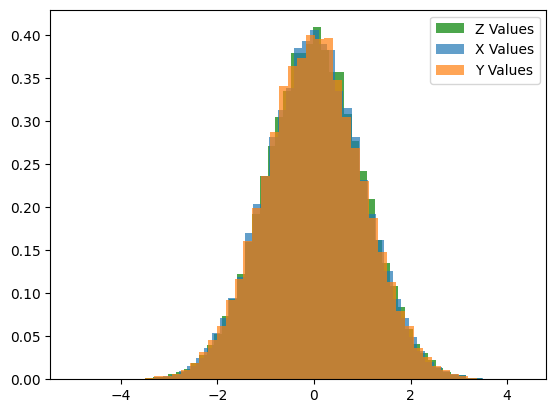

Expected value of R: 1.2545845465264818


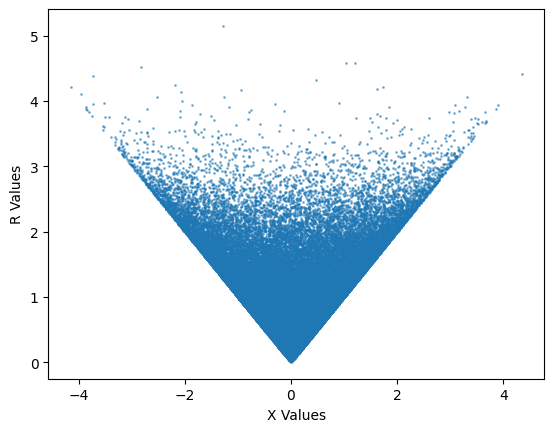

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_values(num_samples):
    u1 = np.random.uniform(0, 1, num_samples)
    u2 = np.random.uniform(0, 1, num_samples)

    values_x = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    values_y = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    return values_x, values_y

def plot_histograms(values_x, values_y):
    plt.hist(values_x, bins=50, density=True, alpha=0.7, label="X Values")
    plt.hist(values_y, bins=50, density=True, alpha=0.7, label="Y Values")
    plt.legend()
    plt.show()

def plot_scatter(values_x, values_y):
    plt.scatter(values_x, values_y, alpha=0.5, s=1)
    plt.xlabel("X Values")
    plt.ylabel("Y Values")
    plt.show()

def calculate_statistics(values_x, values_y):
    corr_xy = np.corrcoef(values_x, values_y)[0, 1]
    mean_x = np.mean(values_x)
    var_x = np.var(values_x)
    mean_y = np.mean(values_y)
    var_y = np.var(values_y)
    
    return corr_xy, mean_x, var_x, mean_y, var_y

def generate_normalized_values(mean_x, var_x, num_samples):
    z_values = np.random.normal(loc=mean_x, scale=np.sqrt(var_x), size=num_samples)
    return z_values

def plot_combined_histogram(values_x, values_y, z_values):
    plt.hist(z_values, bins=50, density=True, alpha=0.7, label="Z Values")
    plt.hist(values_x, bins=50, density=True, alpha=0.7, label="X Values")
    plt.hist(values_y, bins=50, density=True, alpha=0.7, label="Y Values")
    plt.legend()
    plt.show()

def calculate_r_values(values_x, values_y):
    r_values = np.sqrt(values_x**2 + values_y**2)
    return r_values

def plot_scatter_r(values_x, r_values):
    plt.scatter(values_x, r_values, alpha=0.5, s=1)
    plt.xlabel("X Values")
    plt.ylabel("R Values")
    plt.show()

def main(num_samples=50000):
    values_x, values_y = generate_values(num_samples)

    plot_histograms(values_x, values_y)
    plot_scatter(values_x, values_y)

    corr_xy, mean_x, var_x, mean_y, var_y = calculate_statistics(values_x, values_y)
    print(f"Correlation between X and Y: {corr_xy}")
    print(f"Mean of X: {mean_x}, Variance of X: {var_x}")
    print(f"Mean of Y: {mean_y}, Variance of Y: {var_y}")

    z_values = generate_normalized_values(mean_x, var_x, num_samples)
    plot_combined_histogram(values_x, values_y, z_values)

    r_values = calculate_r_values(values_x, values_y)
    expected_r = np.mean(r_values)
    print(f"Expected value of R: {expected_r}")

    plot_scatter_r(values_x, r_values)

main()


2.The near-zero correlation suggests that $ Y_1 $ and $ Y_2 $
  are independent in terms of linear relationships, which is consistent with their definition.


6.$ Y_1 $ and $𝑅$ do not have a strong linear relationship, but further analysis, such as checking for non-linear dependencies or performing independence tests, would be needed to confirm whether they are truly independent.?
